## Final Project Submission

Please fill out:
* Student name: Allison Gao
* Student pace: full time
* Scheduled project review date/time: 08/27/2021
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
import statsmodels
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

%matplotlib inline

## Cleaning/Exploring Data

In [2]:
df1 = pd.read_csv("data/kc_house_data.csv")

In [3]:
df1.shape

(21597, 21)

In [4]:
#created a new column that converted year built into house age 
df1["house_age"] = 2021 - df1["yr_built"]

In [5]:
#dropped columns not relevant for the purpose of our analysis 
df1 = df1.drop(columns=["id","yr_built"])

In [6]:
#dropped rows containing NaN or missing values
df1 = df1.dropna(axis=0, how='any')
df1.shape

(15762, 20)

In [7]:
#pd.set_option("display.max_rows", None)

In [8]:
#drop outlier
df1 = df1[df1.bedrooms != 33]

In [9]:
df1 = df1[df1.sqft_basement != "?"]

In [10]:
df1["sqft_basement"] = df1["sqft_basement"].astype(str).astype(float).astype(int)

In [11]:
# 1 means there is a basement
df1["sqft_basement"] = [1 if x > 0 else 0 for x in df1["sqft_basement"]]

In [12]:
df1["sqft_basement"].value_counts()

0    9362
1    6066
Name: sqft_basement, dtype: int64

In [13]:
#north of the county is 1 and south is zero 


def label_lat (row):
    if row['lat'] >= 47.5000 :
        return 1
    else:
        return 0 


In [14]:
#west side of the county is 1 and east side is zero 

def label_long (row):
    if row['long'] <= (-122.0000) :
        return 1
    else:
        return 0 


In [15]:
df1['county_lat'] = df1.apply (lambda row: label_lat(row), axis=1)

In [16]:
df1['county_long'] = df1.apply (lambda row: label_long(row), axis=1)

In [17]:
cleaned_df = df1

In [18]:
cleaned_df["county_lat"].value_counts()

1    10691
0     4737
Name: county_lat, dtype: int64

In [19]:
cleaned_df["county_long"].value_counts()

1    14378
0     1050
Name: county_long, dtype: int64

In [20]:
non_normal = ['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above','sqft_lot15', 'sqft_living15', 'house_age']
for feat in non_normal:
    cleaned_df[feat] = cleaned_df[feat].map(lambda x: np.log(x))

In [21]:
cleaned_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,county_lat,county_long
1,12/9/2014,13.195614,1.098612,2.25,7.851661,8.887653,2.0,0.0,0.0,3,...,1,1991.0,98125,47.7210,-122.319,7.432484,8.941022,4.248495,1,1
3,12/9/2014,13.311329,1.386294,3.00,7.580700,8.517193,1.0,0.0,0.0,5,...,1,0.0,98136,47.5208,-122.393,7.215240,8.517193,4.025352,1,1
4,2/18/2015,13.142166,1.098612,2.00,7.426549,8.997147,1.0,0.0,0.0,3,...,0,0.0,98074,47.6168,-122.045,7.495542,8.923058,3.526361,1,1
5,5/12/2014,14.022525,1.386294,4.50,8.597851,11.532042,1.0,0.0,0.0,3,...,1,0.0,98053,47.6561,-122.005,8.468003,11.532042,2.995732,1,1
8,4/15/2015,12.343658,1.098612,1.00,7.484369,8.918650,1.0,0.0,0.0,3,...,1,0.0,98146,47.5123,-122.337,7.484369,9.001223,4.110874,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2/19/2015,13.071070,1.098612,2.50,7.177782,7.165493,2.0,0.0,0.0,3,...,1,0.0,98116,47.5773,-122.409,7.192934,7.142827,2.564949,1,1
21592,5/21/2014,12.793859,1.098612,2.50,7.333023,7.030857,3.0,0.0,0.0,3,...,0,0.0,98103,47.6993,-122.346,7.333023,7.319202,2.484907,1,1
21593,2/23/2015,12.899220,1.386294,2.50,7.745003,8.667852,2.0,0.0,0.0,3,...,0,0.0,98146,47.5107,-122.362,7.512071,8.881836,1.945910,1,1
21594,6/23/2014,12.904459,0.693147,0.75,6.927558,7.207860,2.0,0.0,0.0,3,...,0,0.0,98144,47.5944,-122.299,6.927558,7.604396,2.484907,1,1


In [22]:
cleaned_df['sqft_living_waterfront'] = cleaned_df['sqft_living'] * cleaned_df['waterfront']
cleaned_df['sqft_house_neighbors'] = cleaned_df['sqft_living'] * cleaned_df['sqft_living15']
#cleaned_df['sqft_house_neighbors_ratio'] = cleaned_df['sqft_living']/cleaned_df['sqft_living15']
cleaned_df['sqft_living_age'] = cleaned_df['sqft_living'] * cleaned_df['house_age']
cleaned_df['sqft_living_grade'] = cleaned_df['sqft_living'] * cleaned_df['grade']

cleaned_df['sqft15_grade'] = cleaned_df['grade'] * cleaned_df['sqft_living15']

cleaned_df['long_lat'] = cleaned_df['long'] * cleaned_df['lat']

cleaned_df['sqft_lot_age'] = cleaned_df['sqft_lot'] * cleaned_df['house_age']

#cleaned_df['bed_bath_ratio'] = cleaned_df['bedrooms']/cleaned_df['bathrooms']
cleaned_df['bed_bath'] = cleaned_df['bedrooms'] * cleaned_df['bathrooms']

In [23]:
cleaned_df["price"].mean()

13.049546273822779

In [24]:
from datetime import datetime
cleaned_df['month'] = cleaned_df['date'].map(lambda x: datetime.strptime(x, "%m/%d/%Y").month)

In [25]:
seasons = [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]

month_to_season = dict(zip(range(1,13), seasons))

def season(month):
    
    return month_to_season[month]

In [26]:
# Engineering season feature

cleaned_df['season'] = cleaned_df['month'].map(lambda x: int(season(x)))

In [27]:
# Creating dummies out of season feature
from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder object
ohe = OneHotEncoder(drop='first')

# Transform the data into dummies
trans = ohe.fit_transform(cleaned_df[['season']])

# Store the dummies matrix and name vector
data = trans.todense()
names = ohe.get_feature_names()

# Concatenate the dummies df to the original dataset
dummies = pd.DataFrame(data, columns=names)

print(dummies)

cleaned_df = cleaned_df.join(dummies)
cleaned_df.head()

       x0_2  x0_3  x0_4
0       0.0   0.0   1.0
1       0.0   0.0   1.0
2       0.0   0.0   0.0
3       1.0   0.0   0.0
4       1.0   0.0   0.0
...     ...   ...   ...
15423   0.0   0.0   0.0
15424   1.0   0.0   0.0
15425   0.0   0.0   0.0
15426   1.0   0.0   0.0
15427   0.0   0.0   1.0

[15428 rows x 3 columns]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living_grade,sqft15_grade,long_lat,sqft_lot_age,bed_bath,month,season,x0_2,x0_3,x0_4
1,12/9/2014,13.195614,1.098612,2.25,7.851661,8.887653,2.0,0.0,0.0,3,...,54.961628,52.027387,-5837.184999,37.759150,2.471878,12,4,0.0,0.0,1.0
3,12/9/2014,13.311329,1.386294,3.00,7.580700,8.517193,1.0,0.0,0.0,5,...,53.064898,50.506680,-5816.213274,34.284698,4.158883,12,4,1.0,0.0,0.0
4,2/18/2015,13.142166,1.098612,2.00,7.426549,8.997147,1.0,0.0,0.0,3,...,59.412393,59.964336,-5811.392356,31.727185,2.197225,2,1,1.0,0.0,0.0
5,5/12/2014,14.022525,1.386294,4.50,8.597851,11.532042,1.0,0.0,0.0,3,...,94.576362,93.148032,-5814.282481,34.546909,6.238325,5,2,0.0,0.0,0.0
8,4/15/2015,12.343658,1.098612,1.00,7.484369,8.918650,1.0,0.0,0.0,3,...,52.390581,52.390581,-5812.512245,36.663446,1.098612,4,2,0.0,0.0,0.0


In [28]:
cleaned_df.dropna(inplace=True)

In [29]:
cleaned_df['x0_2'] = cleaned_df['x0_2'].map(lambda x:int(x))
cleaned_df['x0_3'] = cleaned_df['x0_3'].map(lambda x:int(x))
cleaned_df['x0_4'] = cleaned_df['x0_4'].map(lambda x:int(x))

In [30]:
cleaned_df = cleaned_df.dropna(axis=0, how='any')

In [31]:
cleaned_df.shape

(11051, 35)

In [32]:
cleaned_df.round(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living_grade,sqft15_grade,long_lat,sqft_lot_age,bed_bath,month,season,x0_2,x0_3,x0_4
1,12/9/2014,13.196,1.099,2.25,7.852,8.888,2.0,0.0,0.0,3,...,54.962,52.027,-5837.185,37.759,2.472,12,4,0,0,1
3,12/9/2014,13.311,1.386,3.00,7.581,8.517,1.0,0.0,0.0,5,...,53.065,50.507,-5816.213,34.285,4.159,12,4,1,0,0
4,2/18/2015,13.142,1.099,2.00,7.427,8.997,1.0,0.0,0.0,3,...,59.412,59.964,-5811.392,31.727,2.197,2,1,1,0,0
5,5/12/2014,14.023,1.386,4.50,8.598,11.532,1.0,0.0,0.0,3,...,94.576,93.148,-5814.282,34.547,6.238,5,2,0,0,0
8,4/15/2015,12.344,1.099,1.00,7.484,8.919,1.0,0.0,0.0,3,...,52.391,52.391,-5812.512,36.663,1.099,4,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15419,4/21/2015,13.210,1.386,3.00,7.490,8.189,1.5,0.0,0.0,3,...,59.920,59.830,-5823.530,39.203,4.159,4,2,0,0,1
15420,7/9/2014,12.612,1.386,1.75,7.507,8.520,1.0,0.0,0.0,4,...,45.040,43.998,-5816.684,38.800,2.426,7,3,1,0,0
15421,10/16/2014,13.122,0.693,1.50,7.473,9.393,1.0,0.0,0.0,4,...,52.311,53.873,-5815.905,37.975,1.040,10,4,0,0,0
15426,8/13/2014,12.628,1.386,2.50,7.828,9.393,1.0,0.0,0.0,3,...,62.624,61.606,-5789.816,35.544,3.466,8,3,1,0,0


In [33]:
cleaned_df = cleaned_df.replace([np.inf, -np.inf], np.nan)

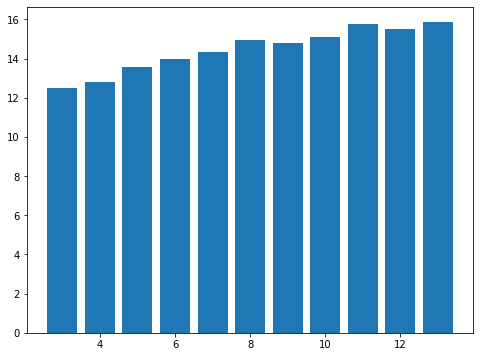

In [34]:
#playing around with grade to see its relationship with price

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
grade = cleaned_df["grade"]
price = cleaned_df["price"]
ax.bar(grade, price)
plt.show()

# Exploring our best model

In [35]:
# Set X and y
X_col14 = ['bedrooms', 
         'bathrooms', 
          'view',
         'sqft_living', 
         'sqft_lot', 
         'sqft_basement',
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'house_age',
         'county_long',
         'county_lat',
         'sqft_living_age',
         'sqft_house_neighbors', 
         'sqft_living_grade']

#'sqft15_grade',
#'long_lat',
#'sqft_lot_age',
#'bed_bath'


#x0_2'                
X14 = cleaned_df[X_col14]
y14 = cleaned_df['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train14, X_test14, y_train14, y_test14 = train_test_split(X14, y14, test_size=0.25, random_state=8)

#print(X_train)
# Scale training and testing data
#scaler = StandardScaler()

#X_train_scale14 = scaler.fit_transform(X_train14)
#X_test_scale14 = scaler.fit_transform(X_test14)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train14, y_train14)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[-0.07503936  0.04398776  0.05363945  0.85701023  0.03227477  0.01322176
  0.06592272  0.51238653  0.07156412 -0.15689742  0.47466636 -0.05862268
  0.90952286 -0.04083785  0.38356861  0.02470176  0.34205893 -0.03563022
 -0.08903262  0.03862025]
-26.97708190110206


In [36]:
# Make predictions
y_hat_train14 = result.predict(X_train14)
y_hat_test14 = result.predict(X_test14)

print(y_hat_train14)

print(y_hat_test14)

[13.51906033 12.6552305  12.18397304 ... 13.6719538  13.0331211
 13.24620992]
[12.33220984 13.95353171 12.89871592 ... 12.72407799 13.37802649
 13.07340995]


In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_train_r2_14 = r2_score(y_train14, y_hat_train14)
print(y_train_r2_14)
y_test_r2_14 = r2_score(y_test14, y_hat_test14)
print(y_test_r2_14)

y_train_rmse14 = mean_squared_error(np.exp(y_train14), np.exp(y_hat_train14), squared = False)
print(y_train_rmse14)
y_test_rmse14 = mean_squared_error(np.exp(y_test14), np.exp(y_hat_test14), squared = False)
print(y_test_rmse14)

0.7856883544082236
0.786481867125228
171338.68634305472
201839.62788040837


In [38]:
# Using the sm.OLS() method, we need to manually add constant to the model
X_train14 = sm.add_constant(X_train14)

# Create the model object
model = sm.OLS(y_train14, X_train14)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1515.
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:58:18   Log-Likelihood:                -26.183
No. Observations:                8288   AIC:                             94.37
Df Residuals:                    8267   BIC:                             241.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -26.9771      4.023     -6.705      0.000     -34.864     -19.090
bedrooms                -0.0750      0.013     -5.801      0.000      -0.100      -0.050
bathrooms                0.0440      0.006      6.785      0.000       0.031       0.057
view                     0.0536      0.004     13.189      0.000       0.046       0.062
sqft_living              0.8570      0.178      4.802      0.000       0.507       1.207
sqft_lot                 0.0323      0.008      4.124      0.000       0.017       0.048
sqft_basement            0.0132      0.007      1.840      0.066      -0.001       0.027
floors                   0.0659      0.008      8.506      0.000       0.051       0.081
waterfront               0.5124      0.034     15.100      0.000       0.446       0.579
condition                0.0716      0.004     16.472      0.000       0.063       0.080
grade                   -0.1569      0.053     -2.960      0.003      -0.261      -0.053
lat                      0.4747      0.035     13.374      0.000       0.405       0.544
long                    -0.0586      0.029     -2.020      0.043      -0.116      -0.002
sqft_living15            0.9095      0.193      4.709      0.000       0.531       1.288
sqft_lot15              -0.0408      0.009     -4.710      0.000      -0.058      -0.024
house_age                0.3836      0.098      3.905      0.000       0.191       0.576
county_long              0.0247      0.014      1.786      0.074      -0.002       0.052
county_lat               0.3421      0.011     30.361      0.000       0.320       0.364
sqft_living_age         -0.0356      0.013     -2.776      0.006      -0.061      -0.010
sqft_house_neighbors    -0.0890      0.026     -3.473      0.001      -0.139      -0.039
sqft_living_grade        0.0386      0.007      5.620      0.000       0.025       0.052
==============================================================================
Omnibus:                      171.341   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.765
Skew:                           0.107   Prob(JB):                     3.71e-75
Kurtosis:                       3.973   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


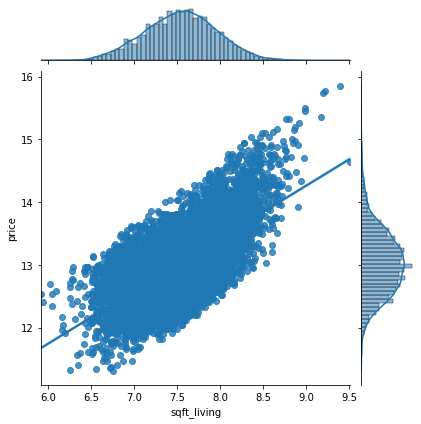

In [39]:
sns.jointplot('sqft_living','price', data=cleaned_df, kind='reg');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


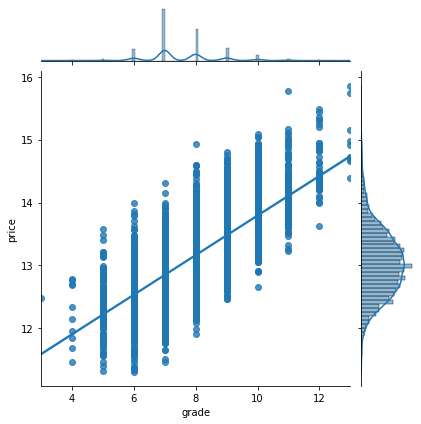

In [40]:
sns.jointplot('grade','price', data=cleaned_df, kind='reg');

In [41]:
cleaned_df["waterfront"].value_counts()

0.0    10970
1.0       81
Name: waterfront, dtype: int64

Text(0.5, 1.0, 'x')

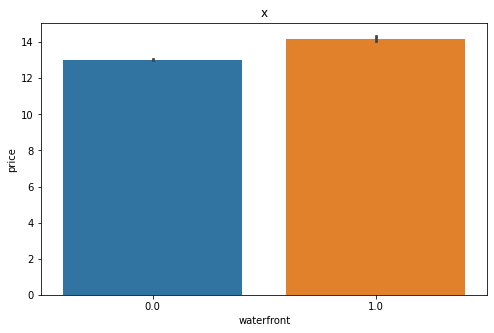

In [42]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(data=cleaned_df, x='waterfront', y='price')
ax.set_title("x")
#fig.savefig('images/histogram_posROI');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


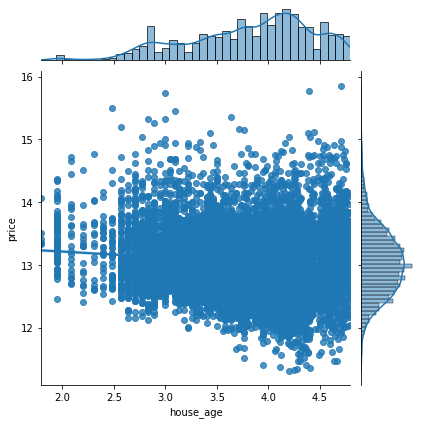

In [43]:
sns.jointplot('house_age','price', data=cleaned_df, kind='reg');

## establish baseline OLS model 

In [44]:
# Set X and y
X_col = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'sqft_above',
         "sqft_basement", 
         'sqft_living15', 
         'sqft_lot15', 
         'house_age',
         'view']

X = cleaned_df[X_col]
y = cleaned_df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=10)


# Scale training and testing data
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale, y_train)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

# Make predictions
y_hat_train = result.predict(X_train_scale)
y_hat_test = result.predict(X_test_scale)

print(y_hat_train)

print(y_hat_test)

lr = LinearRegression()
lr.fit(X_train_scale, y_train)

[-0.04640679  0.04142557  0.08326387 -0.0109758   0.04512697  0.03185906
  0.03225784  0.22505435  0.0647896   0.05285717  0.09664537 -0.04928107
  0.14950927  0.0373044 ]
13.03433960681476
[12.93146109 12.7349898  12.94462578 ... 12.97054869 13.65466408
 13.00357498]
[13.53793419 12.88223834 12.70918758 ... 12.58658966 13.82835243
 12.91710131]


LinearRegression()

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_train_r2 = r2_score(y_train, y_hat_train)
print(y_train_r2)
y_test_r2 = r2_score(y_test, y_hat_test)
print(y_test_r2)

y_train_rmse = mean_squared_error(np.exp(y_train), np.exp(y_hat_train), squared = False)
print(y_train_rmse)
y_test_rmse = mean_squared_error(np.exp(y_test), np.exp(y_hat_test), squared = False)
print(y_test_rmse)

0.6421922951376425
0.649143124488045
202664.0885993764
208589.2269039467


In [46]:
frames = [X_train, y_train]
result = pd.concat(frames, axis = 1)

bedrooms = X_train["bedrooms"]
bathrooms = X_train["bathrooms"]
sqft_living = X_train["sqft_living"]
floors = X_train["floors"]
waterfront = X_train["waterfront"]
condition = X_train["condition"]
grade = X_train["grade"]
sqft_above = X_train["sqft_above"]
sqft_living15= X_train["sqft_living15"]
sqft_lot15= X_train["sqft_lot15"]
house_age= X_train["house_age"]
#sqft_basement= X_train["sqft_basement"]


Y= y_train


formula = 'Y~view+bedrooms+bathrooms+sqft_living+floors+waterfront+condition+sqft_basement+grade+sqft_above+sqft_living15+sqft_lot+sqft_lot15+house_age'
tv_mod = ols(formula=formula, data=result).fit()
tv_mod_summ = tv_mod.summary()
tv_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1061.
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:58:25   Log-Likelihood:                -2188.9
No. Observations:                8288   AIC:                             4408.
Df Residuals:                    8273   BIC:                             4513.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.1286      0.128     47.869      0.000       5.878       6.380
view              0.0484      0.005      9.238      0.000       0.038       0.059
bedrooms         -0.1642      0.017     -9.894      0.000      -0.197      -0.132
bathrooms         0.0546      0.008      6.679      0.000       0.039       0.071
sqft_living       0.1988      0.036      5.499      0.000       0.128       0.270
floors            0.0889      0.010      8.502      0.000       0.068       0.109
waterfront        0.3790      0.045      8.435      0.000       0.291       0.467
condition         0.0478      0.006      8.588      0.000       0.037       0.059
sqft_basement     0.1079      0.015      7.003      0.000       0.078       0.138
grade             0.1941      0.005     36.856      0.000       0.184       0.204
sqft_above        0.1552      0.036      4.345      0.000       0.085       0.225
sqft_living15     0.2999      0.018     16.567      0.000       0.264       0.335
sqft_lot         -0.0127      0.010     -1.256      0.209      -0.033       0.007
sqft_lot15       -0.0635      0.011     -5.717      0.000      -0.085      -0.042
house_age         0.2478      0.008     31.228      0.000       0.232       0.263
==============================================================================
Omnibus:                        9.772   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               11.100
Skew:                          -0.021   Prob(JB):                      0.00389
Kurtosis:                       3.174   Cond. No.                         767.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Using forward selection 
"optimizing adjusted R-squared by adding features that help the most one at a time until the score goes down or you run out of features"
source: https://planspace.org/20150423-forward_selection_with_statsmodels/

In [47]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model


In [48]:
model = forward_selected(df1, "price")
print(model.model.formula)
print(model.rsquared_adj)

price ~ sqft_living_grade + county_lat + sqft_house_neighbors + view + condition + long_lat + yr_renovated + sqft_living_waterfront + date + house_age + floors + bathrooms + bedrooms + sqft_above + sqft_basement + sqft_living_age + zipcode + sqft15_grade + sqft_living15 + grade + sqft_living + sqft_lot15 + sqft_lot + sqft_lot_age + bed_bath + county_long + long + lat + waterfront + 1
0.8051139972266945


In [49]:
model = forward_selected(cleaned_df, "price")
print(model.model.formula)
print(model.rsquared_adj)

price ~ sqft_living_grade + county_lat + sqft_living_age + sqft_house_neighbors + view + condition + long_lat + sqft_living_waterfront + date + yr_renovated + floors + bedrooms + bed_bath + zipcode + sqft_above + house_age + sqft_basement + sqft15_grade + sqft_living15 + grade + sqft_living + long + lat + sqft_lot + sqft_lot_age + sqft_lot15 + bathrooms + waterfront + x0_2 + season + 1
0.8041043935642072


In [50]:
model = forward_selected(result, "price")
print(model.model.formula)
print(model.rsquared_adj)

price ~ grade + house_age + sqft_living + view + sqft_lot15 + sqft_living15 + floors + bedrooms + waterfront + condition + bathrooms + sqft_basement + sqft_above + sqft_lot + 1
0.641586794367901


<AxesSubplot:>

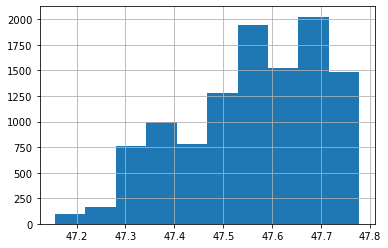

In [51]:
cleaned_df["lat"].hist()

In [52]:
# 1 means north of the county, 0 means south of the county
cleaned_df["lat"] = [1 if x <= 47.5000 else 0 for x in df_outlier33["lat"]]

NameError: name 'df_outlier33' is not defined

### Model 1 # eliminate variables causing multicollinearity

In [ ]:
cleaned_df.corr()

#### Calculate VIF to Drop Columns for Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.sort_values("VIF Factor")

In [ ]:
df11=cleaned_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df11['pairs'] = list(zip(df11.level_0, df11.level_1))

# set index to pairs
df11.set_index(['pairs'], inplace = True)

#d rop level columns
df11.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df11.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df11.drop_duplicates(inplace=True)

In [ ]:
df11[(df11.cc>.5) & (df11.cc <1)]

In [ ]:
import seaborn as sns
sns.heatmap(X_train.corr(), center=0);

In [ ]:
#pd.plotting.scatter_matrix(cleaned_df,figsize  = [24, 24]);
#plt.show()

In [ ]:
sns.jointplot('sqft_living','price', data=cleaned_df, kind='reg');

In [ ]:
sns.jointplot('sqft_living','sqft_above', data=cleaned_df, kind='reg');

In [ ]:
sns.jointplot('grade','price', data=cleaned_df, kind='reg');

In [ ]:
y = cleaned_df["price"]
X = cleaned_df[['bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'condition', "sqft_basement",
       'sqft_living15', 'sqft_lot15', 'house_age']]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=10
)


# Scale training and testing data
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale, y_train)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

# Make predictions
y_hat_train = result.predict(X_train_scale)
y_hat_test = result.predict(X_test_scale)

print(y_hat_train)

print(y_hat_test)

lr = LinearRegression()
lr.fit(X_train_scale, y_train)

In [ ]:
y_train_r2 = r2_score(y_train, y_hat_train)
print(y_train_r2)
y_test_r2 = r2_score(y_test, y_hat_test)
print(y_test_r2)

y_train_rmse = mean_squared_error(np.exp(y_train), np.exp(y_hat_train), squared = False)
print(y_train_rmse)
y_test_rmse = mean_squared_error(np.exp(y_test), np.exp(y_hat_test), squared = False)
print(y_test_rmse)

In [ ]:
#MAE
metrics.mean_absolute_error(y_train, lr.predict(X_train_scale))

In [ ]:
metrics.mean_absolute_error(y_test, lr.predict(X_test_scale))

In [ ]:
#RMSE
np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train_scale)))

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test_scale)))

In [ ]:
frames = [X_train, y_train]
result = pd.concat(frames, axis = 1)

bedrooms = X_train["bedrooms"]
bathrooms = X_train["bathrooms"]
#sqft_living = X_train["sqft_living"]
floors = X_train["floors"]
waterfront = X_train["waterfront"]
condition = X_train["condition"]
#grade = X_train["grade"]
#sqft_above = X_train["sqft_above"]
sqft_living15= X_train["sqft_living15"]
sqft_lot15= X_train["sqft_lot15"]
house_age= X_train["house_age"]
sqft_basement= X_train["sqft_basement"]


Y= y_train


formula = 'Y~bedrooms+bathrooms+floors+waterfront+condition+sqft_basement+sqft_living15+sqft_lot+sqft_lot15+house_age'
tv_mod = ols(formula=formula, data=result).fit()
tv_mod_summ = tv_mod.summary()
tv_mod_summ

# model 2 

In [ ]:
cleaned_df["age_sqft_living"] = cleaned_df["house_age"] * cleaned_df["sqft_living"] 
cleaned_df["waterfront_condition"] = cleaned_df["waterfront"] * cleaned_df["condition"] 
cleaned_df["house_age_condition"] = cleaned_df["house_age"] * cleaned_df["condition"] 
cleaned_df["sqft_basement_bedrooms"] = cleaned_df["sqft_basement"] * cleaned_df["bedrooms"]
cleaned_df["floors_condition"] = cleaned_df["floors"] * cleaned_df["condition"]
cleaned_df["grade_condition"] = cleaned_df["grade"] * cleaned_df["condition"]
cleaned_df["bedrooms_condition"] = cleaned_df["bedrooms"] * cleaned_df["condition"]
cleaned_df["sqft_basement_condition"] = cleaned_df["sqft_basement"] * cleaned_df["condition"]
cleaned_df["bathrooms_condition"] = cleaned_df["bathrooms"] * cleaned_df["condition"]
cleaned_df["sqft_living_condition"] = cleaned_df["sqft_living"] * cleaned_df["condition"]

In [ ]:
cleaned_df_interaction = cleaned_df

In [ ]:
y = cleaned_df_interaction["price"]
X = cleaned_df_interaction[['bedrooms',"sqft_living_condition","bathrooms_condition","sqft_basement_condition","bedrooms_condition","grade_condition", "floors_condition",'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition',"grade",'sqft_above', "sqft_basement",
       'sqft_living15', 'sqft_lot15', 'house_age',"age_sqft_living","waterfront_condition","house_age_condition","sqft_basement_bedrooms"]]


#X = cleaned_df[['bathrooms', 'sqft_lot', 'floors',
       #'waterfront', 'condition', 'sqft_above', 'lat', 'long',
       #'sqft_living15', 'sqft_lot15', 'house_age']]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=10
)


# Scale training and testing data
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale, y_train)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

# Make predictions
y_hat_train = result.predict(X_train_scale)
y_hat_test = result.predict(X_test_scale)

print(y_hat_train)

print(y_hat_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scale, y_train)

In [ ]:
metrics.mean_absolute_error(y_train, lr.predict(X_train_scale))

In [ ]:
y_train_r2 = r2_score(y_train, y_hat_train)
print(y_train_r2)
y_test_r2 = r2_score(y_test, y_hat_test)
print(y_test_r2)

y_train_rmse = mean_squared_error(np.exp(y_train), np.exp(y_hat_train), squared = False)
print(y_train_rmse)
y_test_rmse = mean_squared_error(np.exp(y_test), np.exp(y_hat_test), squared = False)
print(y_test_rmse)

In [ ]:
metrics.mean_absolute_error(y_test, lr.predict(X_test_scale))

In [ ]:
np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train_scale)))

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test_scale)))

In [ ]:
frames = [X_train, y_train]
result = pd.concat(frames, axis = 1)

bedrooms = X_train["bedrooms"]
bathrooms = X_train["bathrooms"]
sqft_living = X_train["sqft_living"]
floors = X_train["floors"]
waterfront = X_train["waterfront"]
condition = X_train["condition"]
#grade = X_train["grade"]
#sqft_above = X_train["sqft_above"]
#sqft_living15= X_train["sqft_living15"]
sqft_lot15= X_train["sqft_lot15"]
house_age= X_train["house_age"]
sqft_basement= X_train["sqft_basement"]
age_sqft_living=X_train["age_sqft_living"]
waterfront_condition=X_train["waterfront_condition"]
house_age_condition=X_train["house_age_condition"]
sqft_basement_bedrooms=X_train["sqft_basement_bedrooms"]
floors_condition=X_train["floors_condition"]
grade_condition=X_train["grade_condition"]
sqft_living_condition=X_train["sqft_living_condition"]

Y= y_train


formula = 'Y~bedrooms+sqft_living_condition+floors_condition+grade_condition+house_age_condition+sqft_basement_bedrooms+bathrooms+sqft_living+floors+waterfront+condition+sqft_basement+grade+sqft_above+sqft_living15+sqft_lot+sqft_lot15+house_age+waterfront_condition+age_sqft_living'
tv_mod = ols(formula=formula, data=result).fit()
tv_mod_summ = tv_mod.summary()
tv_mod_summ

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.sort_values("VIF Factor")

### model 4 start from the beginning 

In [ ]:
pd.set_option("display.max_rows", None)

In [ ]:
df_3 = df1.drop(columns=["zipcode", "id","date", "lat", "long"])

In [ ]:
df_3_dropped_na = df_3.dropna(axis=0, how='any')

In [ ]:
df_3_dropped_na["house_age"] = 2021 - df_dropped_na["yr_built"]

In [ ]:
df_3_dropped_na["yr_renovated"] = df_3_dropped_na["yr_renovated"].fillna(0)

In [ ]:
# 0 means no rennovation or unknown 1 means rennovation was done at some point
df_3_dropped_na["yr_renovated"] = [0 if x == 0 else 1 for x in df_3_dropped_na["yr_renovated"]]

In [ ]:
df_3_dropped_na["yr_renovated"].value_counts()

In [ ]:
df_3_outlier33 = df_3_dropped_na[df_3_dropped_na.bedrooms < 33]

In [ ]:
df_3_outlier33 = df_3_outlier33[df_3_outlier33.sqft_basement != "?"]

In [ ]:
df_3_outlier33["sqft_basement"] = df_3_outlier33["sqft_basement"].astype(str).astype(float).astype(int)
df_3_outlier33["sqft_basement"] = [1 if x > 0 else 0 for x in df_3_outlier33["sqft_basement"]]

In [ ]:
df_3_cleaned = df_3_outlier33

In [ ]:
df_3_cleaned.columns

In [ ]:
df_3_cleaned["price"].mean()

In [ ]:
df_3_cleaned=df_3_cleaned.replace('?',np.nan).dropna(axis = 0, how = 'any')

In [ ]:
df_3_cleaned.shape

In [ ]:
y = df_3_cleaned["price"]
X = df_3_cleaned[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'house_age']]




#X = cleaned_df[['bathrooms', 'sqft_lot', 'floors',
       #'waterfront', 'condition', 'sqft_above', 'lat', 'long',
       #'sqft_living15', 'sqft_lot15', 'house_age']]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=10
)


# Scale training and testing data
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale, y_train)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

# Make predictions
y_hat_train = result.predict(X_train_scale)
y_hat_test = result.predict(X_test_scale)

print(y_hat_train)

print(y_hat_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scale, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_train_r2 = r2_score(y_train, y_hat_train)
print(y_train_r2)
y_test_r2 = r2_score(y_test, y_hat_test)
print(y_test_r2)

y_train_rmse = mean_squared_error(np.exp(y_train), np.exp(y_hat_train), squared = False)
print(y_train_rmse)
y_test_rmse = mean_squared_error(np.exp(y_test), np.exp(y_hat_test), squared = False)
print(y_test_rmse)

In [ ]:
metrics.mean_absolute_error(y_train, lr.predict(X_train_scale))

In [ ]:
metrics.mean_absolute_error(y_test, lr.predict(X_test_scale))

In [ ]:
np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train_scale)))

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test_scale)))

In [ ]:
frames = [X_train, y_train]
result = pd.concat(frames, axis = 1)

bedrooms = X_train["bedrooms"]
bathrooms = X_train["bathrooms"]
sqft_living = X_train["sqft_living"]
floors = X_train["floors"]
waterfront = X_train["waterfront"]
condition = X_train["condition"]
grade = X_train["grade"]
sqft_above = X_train["sqft_above"]
sqft_living15= X_train["sqft_living15"]
sqft_lot15= X_train["sqft_lot15"]
house_age= X_train["house_age"]
sqft_basement= X_train["sqft_basement"]


Y= y_train


formula = 'Y~bedrooms+bathrooms+sqft_living+floors+waterfront+condition+sqft_basement+grade+sqft_above+sqft_living15+sqft_lot+sqft_lot15+house_age'
tv_mod = ols(formula=formula, data=result).fit()
tv_mod_summ = tv_mod.summary()
tv_mod_summ

### model 5

In [ ]:
df_3_cleaned

df_3_cleaned["age_sqft_living"] = df_3_cleaned["house_age"] * df_3_cleaned["sqft_living"] 
df_3_cleaned["waterfront_condition"] = df_3_cleaned["waterfront"] * df_3_cleaned["condition"] 
df_3_cleaned["house_age_condition"] = df_3_cleaned["house_age"] * df_3_cleaned["condition"] 
df_3_cleaned["sqft_basement_bedrooms"] = df_3_cleaned["sqft_basement"] * df_3_cleaned["bedrooms"]
df_3_cleaned["floors_condition"] = df_3_cleaned["floors"] * df_3_cleaned["condition"]
df_3_cleaned["grade_condition"] = df_3_cleaned["grade"] * df_3_cleaned["condition"]
df_3_cleaned["bedrooms_condition"] = df_3_cleaned["bedrooms"] * df_3_cleaned["condition"]
df_3_cleaned["sqft_basement_condition"] = df_3_cleaned["sqft_basement"] * df_3_cleaned["condition"]
df_3_cleaned["bathrooms_condition"] = df_3_cleaned["bathrooms"] * df_3_cleaned["condition"]
df_3_cleaned["sqft_living_condition"] = df_3_cleaned["sqft_living"] * df_3_cleaned["condition"]

In [ ]:
cleaned_df_3_interaction = cleaned_df

In [ ]:
y = cleaned_df_3_interaction["price"]
X = cleaned_df_3_interaction[['bedrooms',"sqft_living_condition","bathrooms_condition","sqft_basement_condition","bedrooms_condition","grade_condition", "floors_condition",'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition',"grade",'sqft_above', "sqft_basement",
       'sqft_living15', 'sqft_lot15', 'house_age',"age_sqft_living","waterfront_condition","house_age_condition","sqft_basement_bedrooms"]]


#X = cleaned_df[['bathrooms', 'sqft_lot', 'floors',
       #'waterfront', 'condition', 'sqft_above', 'lat', 'long',
       #'sqft_living15', 'sqft_lot15', 'house_age']]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=10
)


# Scale training and testing data
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale, y_train)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

# Make predictions
y_hat_train = result.predict(X_train_scale)
y_hat_test = result.predict(X_test_scale)

print(y_hat_train)

print(y_hat_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scale, y_train)

In [ ]:
metrics.mean_absolute_error(y_train, lr.predict(X_train_scale))

In [ ]:
metrics.mean_absolute_error(y_test, lr.predict(X_test_scale))

In [ ]:
np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train_scale)))

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test_scale)))

In [ ]:
y_train_r2 = r2_score(y_train, y_hat_train)
print(y_train_r2)
y_test_r2 = r2_score(y_test, y_hat_test)
print(y_test_r2)

y_train_rmse = mean_squared_error(np.exp(y_train), np.exp(y_hat_train), squared = False)
print(y_train_rmse)
y_test_rmse = mean_squared_error(np.exp(y_test), np.exp(y_hat_test), squared = False)
print(y_test_rmse)

### model 6

In [ ]:
df_3_cleaned

df_3_cleaned["age_sqft_living"] = df_3_cleaned["house_age"] * df_3_cleaned["sqft_living"] 
df_3_cleaned["waterfront_condition"] = df_3_cleaned["waterfront"] * df_3_cleaned["condition"] 
df_3_cleaned["house_age_condition"] = df_3_cleaned["house_age"] * df_3_cleaned["condition"] 
df_3_cleaned["sqft_basement_bedrooms"] = df_3_cleaned["sqft_basement"] * df_3_cleaned["bedrooms"]
df_3_cleaned["floors_condition"] = df_3_cleaned["floors"] * df_3_cleaned["condition"]
df_3_cleaned["grade_condition"] = df_3_cleaned["grade"] * df_3_cleaned["condition"]
df_3_cleaned["bedrooms_condition"] = df_3_cleaned["bedrooms"] * df_3_cleaned["condition"]
df_3_cleaned["sqft_basement_condition"] = df_3_cleaned["sqft_basement"] * df_3_cleaned["condition"]
df_3_cleaned["bathrooms_condition"] = df_3_cleaned["bathrooms"] * df_3_cleaned["condition"]
df_3_cleaned["sqft_living_condition"] = df_3_cleaned["sqft_living"] * df_3_cleaned["condition"]

In [ ]:
cleaned_df_3_interaction = df_3_cleaned

In [ ]:
y = cleaned_df_3_interaction["price"]
X = cleaned_df_3_interaction[['bedrooms',"grade", 'sqft_lot',"grade_condition","sqft_basement_bedrooms", "sqft_living_condition","bathrooms_condition","sqft_basement_condition","bedrooms_condition","floors_condition",'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'condition', "sqft_basement",
      'house_age',"age_sqft_living","waterfront_condition","house_age_condition"]]


#'sqft_above'
#'sqft_living15', 
#'sqft_lot15', 
#"sqft_basement_bedrooms"
#grade
#"grade_condition"
#

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=10
)


# Scale training and testing data
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale, y_train)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

# Make predictions
y_hat_train = result.predict(X_train_scale)
y_hat_test = result.predict(X_test_scale)

print(y_hat_train)

print(y_hat_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scale, y_train)

In [ ]:
metrics.mean_absolute_error(y_train, lr.predict(X_train_scale))

In [ ]:
metrics.mean_absolute_error(y_test, lr.predict(X_test_scale))

In [ ]:
np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train_scale)))

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test_scale)))

In [ ]:
frames = [X_train, y_train]
result = pd.concat(frames, axis = 1)

bedrooms = X_train["bedrooms"]
bathrooms = X_train["bathrooms"]
sqft_living = X_train["sqft_living"]
floors = X_train["floors"]
waterfront = X_train["waterfront"]
condition = X_train["condition"]
#grade = X_train["grade"]
#sqft_above = X_train["sqft_above"]
#sqft_living15= X_train["sqft_living15"]
#sqft_lot15= X_train["sqft_lot15"]
house_age= X_train["house_age"]
sqft_basement= X_train["sqft_basement"]
age_sqft_living=X_train["age_sqft_living"]
waterfront_condition=X_train["waterfront_condition"]
house_age_condition=X_train["house_age_condition"]
sqft_basement_bedrooms=X_train["sqft_basement_bedrooms"]
floors_condition=X_train["floors_condition"]
#grade_condition=X_train["grade_condition"]
sqft_living_condition=X_train["sqft_living_condition"]



Y= y_train

formula = 'Y~bedrooms+grade+grade_condition+sqft_basement_bedrooms+sqft_lot+sqft_living_condition+bathrooms_condition+sqft_basement_condition+bedrooms_condition+floors_condition+bathrooms+sqft_living+floors++waterfront+condition+sqft_basement+house_age+age_sqft_living+waterfront_condition+house_age_condition'
tv_mod = ols(formula=formula, data=result).fit()
tv_mod_summ = tv_mod.summary()
tv_mod_summ

In [ ]:
y_train_r2 = r2_score(y_train, y_hat_train)
print(y_train_r2)
y_test_r2 = r2_score(y_test, y_hat_test)
print(y_test_r2)

y_train_rmse = mean_squared_error(np.exp(y_train), np.exp(y_hat_train), squared = False)
print(y_train_rmse)
y_test_rmse = mean_squared_error(np.exp(y_test), np.exp(y_hat_test), squared = False)
print(y_test_rmse)

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.sort_values("VIF Factor")

In [ ]:
y_train_r2_12 = r2_score(y_train12, y_hat_train12)
print(y_train_r2_12)
y_test_r2_12 = r2_score(y_test12, y_hat_test12)
print(y_test_r2_12)
y_train_rmse12 = mean_squared_error(np.exp(y_train12), np.exp(y_hat_train12), squared = False)
print(y_train_rmse12)
y_test_rmse12 = mean_squared_error(np.exp(y_test12), np.exp(y_hat_test12), squared = False)
print(y_test_rmse12)